In [76]:
import pandas as pd
import networkx as nx
import numpy as np
import random
from tqdm import tqdm
import json

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [55]:
def party_members(my_dict):
    return [len(value) for value in my_dict]

In [2]:
fields = ['yr','rt3ISO','pt3ISO','cmdCode','TradeValue']
df = pd.read_csv("current_data/final_dataset.csv", skipinitialspace = True, usecols = fields)
df_mono = df.loc[(df.cmdCode == 1) & (df.yr == 2015)].reset_index()

G = nx.from_pandas_edgelist(df_mono,
                             source       = 'rt3ISO',
                             target       = 'pt3ISO',
                             edge_attr    =  'TradeValue',
                             create_using = nx.DiGraph())

In [73]:
p = 0.7
years = np.unique(df.yr)
commodities = np.unique(df.cmdCode)
rich_club = {comm : [] for comm in commodities}
for cc, comm in enumerate(commodities):
    for yy, year in enumerate(years):
        df_tmp     = df.loc[(df.cmdCode == comm) & (df.yr == year)].reset_index()
        tot_export = df_tmp.groupby('pt3ISO')['TradeValue'].sum().values.sum()
        df_export  = df_tmp.groupby('pt3ISO').sum().reset_index().loc[:,['pt3ISO', 'TradeValue']].sort_values(by=['TradeValue'], axis=0, ascending=False).reset_index()
        rich_mask  = list(df_export.TradeValue.cumsum() < tot_export*p)
        rich_club[comm].append(df_export.pt3ISO[rich_mask].values)


In [87]:
p = 0.5
rich_rich_club = []
for year in years:
    df_tmp     = df.loc[df.yr == year].reset_index()
    tot_export = df_tmp.groupby('pt3ISO')['TradeValue'].sum().values.sum()
    df_export  = df_tmp.groupby('pt3ISO').sum().reset_index().loc[:,['pt3ISO', 'TradeValue']].sort_values(by=['TradeValue'], axis=0, ascending=False).reset_index()
    rich_mask  = list(df_export.TradeValue.cumsum() < tot_export*p)
    rich_rich_club.append(df_export.pt3ISO[rich_mask].values)

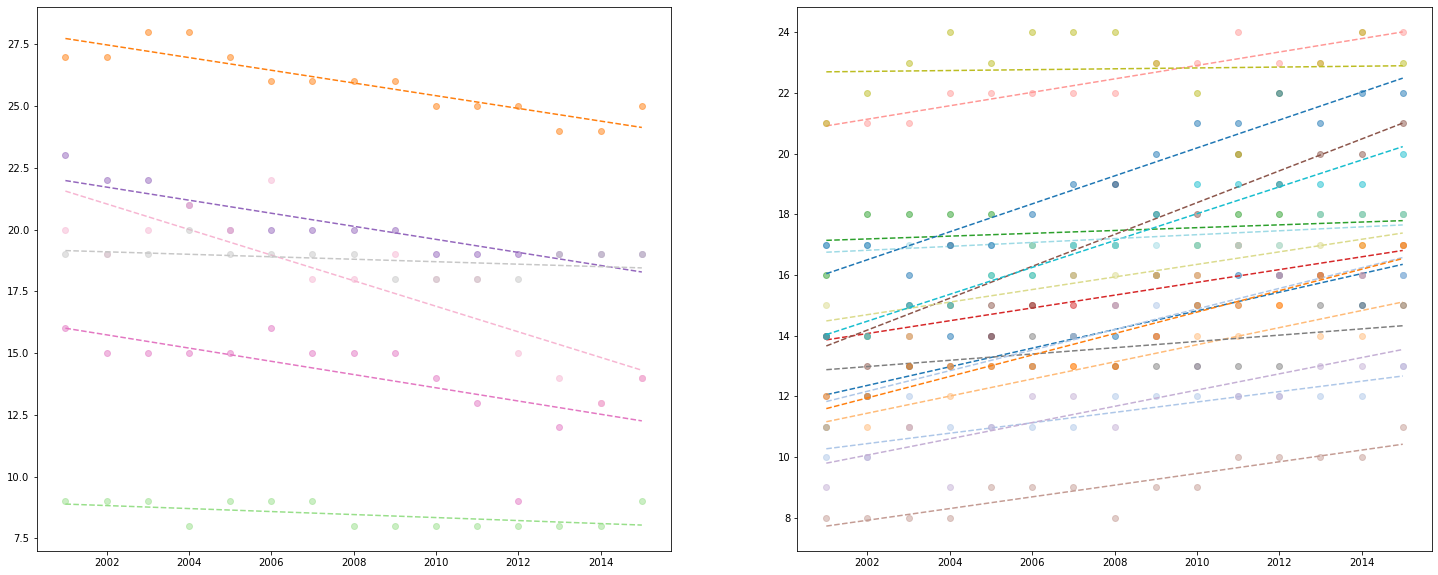

In [90]:
fig, ax = plt.subplots(1,2, figsize=[25,10])
cmap = get_cmap('tab20')  # type: matplotlib.colors.ListedColormap
colorss = cmap.colors  # type: list
for cc,comm in enumerate(commodities):
    y = party_members(rich_club[comm])
    b, a = np.polyfit(years, y, 1)
    if (b<0):
        ax[0].plot(years, y, 'o', color=colorss[cc%20], alpha=0.5)
        ax[0].plot(years, a + b*years, '--', color=colorss[cc%20])
    else:
        ax[1].plot(years, y, 'o', color=colorss[cc%20], alpha=0.5)
        ax[1].plot(years, a + b*years, '--', color=colorss[cc%20])
        

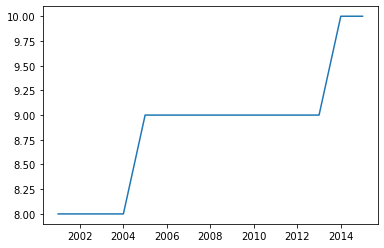

In [88]:
plt.plot(years, party_members(rich_rich_club))

In [ ]:
## Diersifica<ione di mercato